In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten , Dropout

## Get the data and pre-process it

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape , y_train.shape , X_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
def plot_input_img(i):
    plt.imshow(X_train[i], cmap='binary')
    plt.title(y_train[i])
    plt.show()
     

     

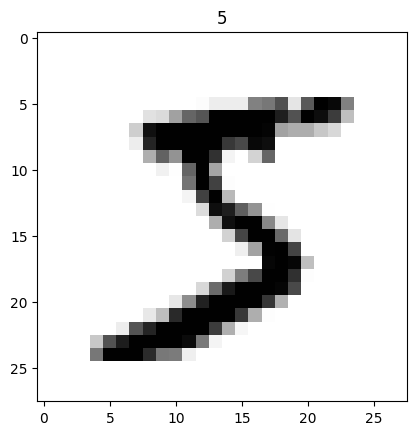

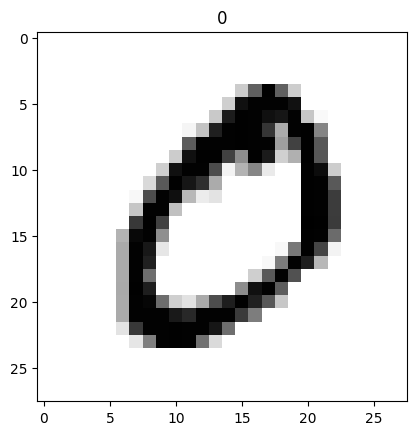

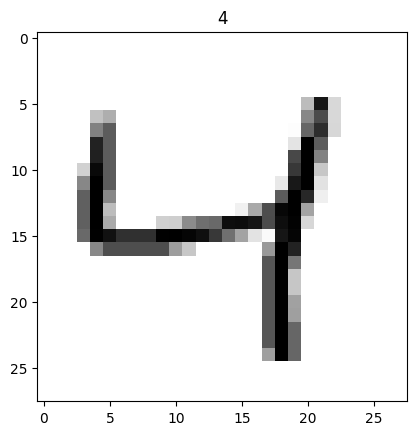

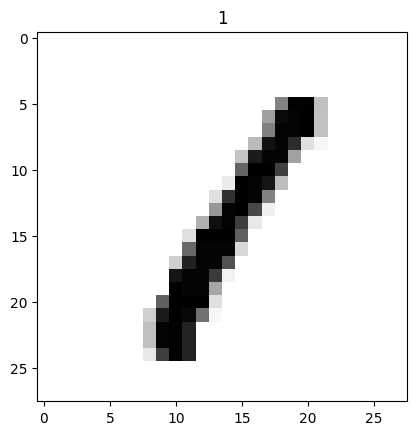

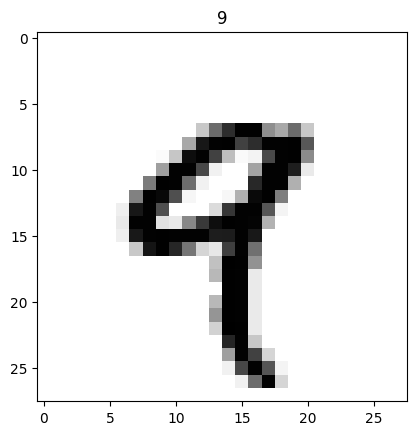

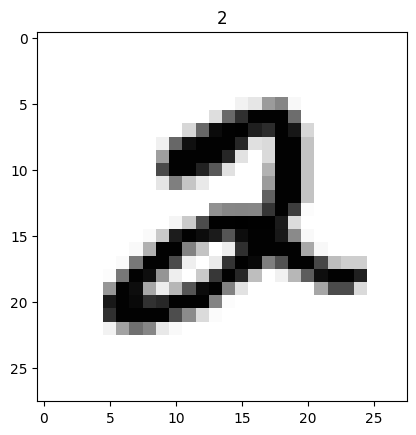

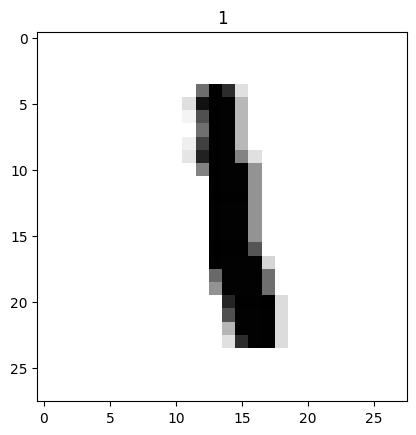

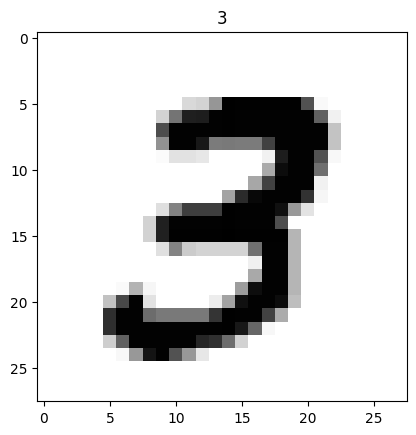

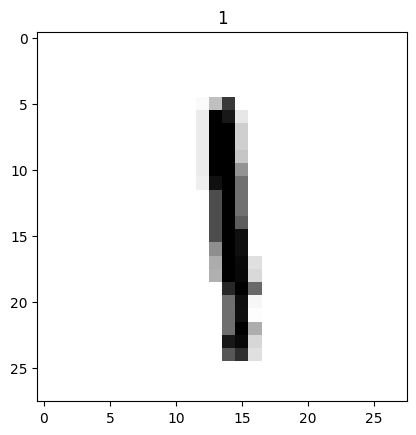

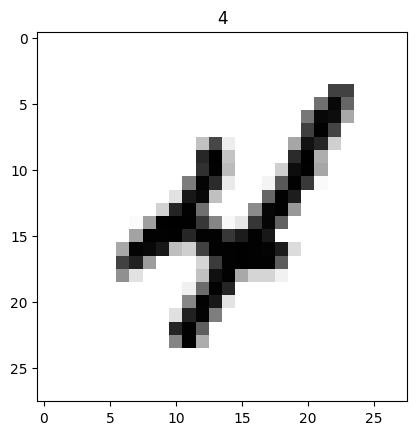

In [4]:
for i in range(10):
    plot_input_img(i)

In [5]:
#Pre process the images

#Normalizing the image to [0,1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

#Reshape/ expand the dimentions of images to (28, 28,1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test , -1)

#convert classes to one hot vectors


from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [6]:


model = Sequential()
 
model.add(Conv2D(32, (3, 3),input_shape= (28,28,1) ,activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
 


c:\Users\DIVYA\OneDrive\Desktop\Project1\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
#callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

#Earlystopping
es=EarlyStopping(monitor = 'val_acc', min_delta=0.01, patience=4, verbose =1)

#ModelCheckpoint
mc= ModelCheckpoint("./trained_model.h5", monitor= "val_acc", verbose=1, save_best_only= True)

#cb=keras.callbacks.EarlyStopping([es, mc])
cb = [
    keras.callbacks.EarlyStopping(monitor='val_acc', patience=4, mode='max'),
    keras.callbacks.ModelCheckpoint("./trained_model.h5", monitor="val_acc", verbose=1, save_best_only=True, mode='max')
]

In [10]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)




Model Training

In [ ]:
his = model.fit(X_train, y_train,epochs=25,validation_split=0.3,callbacks=cb)

Epoch 1/25
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8486 - loss: 0.4830

c:\Users\DIVYA\OneDrive\Desktop\Project1\venv\Lib\site-packages\keras\src\callbacks\early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
c:\Users\DIVYA\OneDrive\Desktop\Project1\venv\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:276: UserWarning: Can save best model only with val_acc available.
  if self._should_save_model(epoch, batch, logs, filepath):


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9327 - loss: 0.2201 - val_accuracy: 0.9778 - val_loss: 0.0758
Epoch 2/25
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9771 - loss: 0.0776

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9768 - loss: 0.0745 - val_accuracy: 0.9842 - val_loss: 0.0557
Epoch 3/25
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9831 - loss: 0.0560

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9835 - loss: 0.0543 - val_accuracy: 0.9849 - val_loss: 0.0506
Epoch 4/25
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9868 - loss: 0.0466

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9868 - loss: 0.0441 - val_accuracy: 0.9869 - val_loss: 0.0480
Epoch 5/25
 930/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9883 - loss: 0.0339

In [ ]:
model.save("trained_model.h5")
model_S = keras.models.load_model(r"C:/Users/DIVYA/OneDrive/Desktop/Project1/trained_model.h5")

In [ ]:
score = model_S.evaluate(X_test, y_test)

print(f"The model accuracy is {score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9917 - loss: 0.0362
The model accuracy is 0.9916999936103821
